# 1. Naive Bayes (33pts)
In this assignment, using Breast Cancer Wisconsin (Diagnostic) Data Set (WDBC) dataset, you will build Naive bayes modelt to classify the prognosis (benign (1) or malignant (2)). 
#### Feature description
Ten real-valued features are computed for each of 3 cell nuclei, yielding a total of 30 descriptive features. See the papers below for more details on how they were computed. The 10 features (in order) are:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

In [26]:
# import libraries and dataset
# Do not import any other libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB, GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

wdbc = fetch_openml(name="wdbc", as_frame=True)

X = wdbc.data.select_dtypes(np.number)
y = wdbc.target

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=100, stratify=y)

## A. Bernoulli NB
To build a Bernoulli NB, if a value of a specific feature is greater than the average of the feature in the training set, the feature value is converted to 1; otherwise, it is converted to 0. 

### (1) After the conversion, train a Bernoulli NB using training set (the converted trnX, trnY) (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then, calculate the overall accuracy and accuracy values corresponding to each target class for the validation set, respectively and print those values. (4pts)

In [28]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB

# 1. Binarize features based on the mean of the training set
mean_vals = trnX.mean()
trnX_bin = (trnX > mean_vals).astype(int)
valX_bin = (valX > mean_vals).astype(int)

# 2. Train Bernoulli Naive Bayes model (alpha=1)
bnb = BernoulliNB(alpha=1)
bnb.fit(trnX_bin, trnY)

# 3. Predict on the validation set
val_pred = bnb.predict(valX_bin)

# 4. Print overall accuracy
overall_accuracy = accuracy_score(valY, val_pred)
print("Overall Accuracy:", overall_accuracy)

# 5. Print class-wise accuracy report
report = classification_report(valY, val_pred, target_names=bnb.classes_)
print("\nClass-wise Accuracy:\n", report)


Overall Accuracy: 0.9298245614035088

Class-wise Accuracy:
               precision    recall  f1-score   support

           1       0.98      0.90      0.94        72
           2       0.85      0.98      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



### (2) Find the variables among the 30 explanatory variables for which the probability of being malignant is lower when their values are greater than the mean compared to when they are not. Print the names of these variables. (4pts)

In [29]:
# Safely get the index of the malignant class
malignant_label = 'M' if 'M' in bnb.classes_ else bnb.classes_[1]
malignant_index = np.where(bnb.classes_ == malignant_label)[0][0]

# P(feature = 1 | malignant): probability of being malignant when the feature value is above the mean
prob_1 = np.exp(bnb.feature_log_prob_[malignant_index])
prob_0 = 1 - prob_1  # when feature value is less than or equal to the mean

# Identify features where P(1|M) < P(0|M): higher value decreases probability of being malignant
condition = prob_1 < prob_0
reduced_malignant_features = trnX.columns[condition]

# Print results
print("✔️ Features where high values reduce the probability of being malignant:")
for f in reduced_malignant_features:
    print("-", f)


✔️ Features where high values reduce the probability of being malignant:
- V10
- V12
- V15
- V19
- V20


### (3) Print the names of the top 5 variables that increase the probability of the benign class when their values are greater than the mean. (4pts)

In [30]:
# Safely get the index of the benign class
benign_label = 'B' if 'B' in bnb.classes_ else bnb.classes_[0]
benign_index = np.where(bnb.classes_ == benign_label)[0][0]

# P(feature = 1 | benign): probability of being benign when feature value > mean
prob_benign_1 = np.exp(bnb.feature_log_prob_[benign_index])

# Get top 5 features with highest P(1|B)
top5_indices = np.argsort(prob_benign_1)[-5:][::-1]
top5_features = trnX.columns[top5_indices]

# Print results
print("✔️ Top 5 features that increase benign probability when above the mean:")
for f in top5_features:
    print("-", f)


✔️ Top 5 features that increase benign probability when above the mean:
- V12
- V10
- V15
- V19
- V9


### (4) Convert the original input data into binary data using the median of each variable instead of the mean as the threshold, and then train a Bernoulli Naive Bayes model. The median values should be determined from the training dataset (trnX). After generating binary datasets for both trnX and valX based on these median values, train the Bernoulli Naive Bayes model using the training data. Then, calculate and print the overall accuracy on the entire validation dataset as well as the accuracy for each class. (4pts)

In [31]:
# 1. Compute median for each feature from training set
medians = trnX.median()

# 2. Binarize training and validation data using the median threshold
trnX_bin_median = (trnX > medians).astype(int)
valX_bin_median = (valX > medians).astype(int)

# 3. Train Bernoulli Naive Bayes model
bnb_median = BernoulliNB(alpha=1)
bnb_median.fit(trnX_bin_median, trnY)

# 4. Predict on validation data
val_pred_median = bnb_median.predict(valX_bin_median)

# 5. Evaluate
overall_accuracy_median = accuracy_score(valY, val_pred_median)
report_median = classification_report(valY, val_pred_median, target_names=bnb_median.classes_)

# 6. Print results
print("✔️ Overall Accuracy (using median binarization):", overall_accuracy_median)
print("\n✔️ Class-wise Accuracy Report:\n", report_median)


✔️ Overall Accuracy (using median binarization): 0.9035087719298246

✔️ Class-wise Accuracy Report:
               precision    recall  f1-score   support

           1       0.97      0.88      0.92        72
           2       0.82      0.95      0.88        42

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



### (5) Compare the Bernoulli Naive Bayes models from problems (1) and (4) and explain which model is better. (5pts)

I compared the performance of two Bernoulli Naive Bayes models:
- **Model 1**: Input features were binarized using the **mean** of each variable.
- **Model 4**: Input features were binarized using the **median** of each variable.

#### Evaluation Results

| Metric              | Mean Binarization (A-1) | Median Binarization (A-4) |
|---------------------|--------------------------|----------------------------|
| **Overall Accuracy**| 0.930                    | 0.904                      |
| **Precision (Class 1)** | 0.98                 | 0.97                       |
| **Recall (Class 1)**    | 0.90                 | 0.88                       |
| **Precision (Class 2)** | 0.85                 | 0.82                       |
| **Recall (Class 2)**    | 0.98                 | 0.95                       |

#### Analysis

- The **mean-based model (A-1)** achieved a higher overall accuracy (93%) than the median-based model (90%).
- It also performed better in **Class 1 recall** (benign cases) and **Class 2 precision** (malignant cases).
- Although median-based binarization is generally more robust to outliers, in this case, the **mean-based binarization yielded better balanced and accurate predictions** across both classes.

#### Conclusion

The Bernoulli Naive Bayes model using **mean-based binarization** is superior in this case, showing higher overall and class-wise accuracy.
Therefore, **Model 1 is better** for this dataset.


## B. Guassian NB

### (1) This time, the Gaussian NB model will be trained using the original dataset without any modifications. After train a Gaussian NB model using the training set, calculate and print the overall accuracy on the entire validation dataset as well as the accuracy for each class. (3pts)

In [32]:
# Train a Gaussian Naive Bayes model on the original (non-binarized) training data
gnb = GaussianNB()
gnb.fit(trnX, trnY)

# Predict on validation data
val_pred_gnb = gnb.predict(valX)

# Evaluate accuracy
overall_accuracy_gnb = accuracy_score(valY, val_pred_gnb)
report_gnb = classification_report(valY, val_pred_gnb, target_names=gnb.classes_)

# Print results
print("✔️ Overall Accuracy (Gaussian NB, original data):", overall_accuracy_gnb)
print("\n✔️ Class-wise Accuracy Report:\n", report_gnb)


✔️ Overall Accuracy (Gaussian NB, original data): 0.9473684210526315

✔️ Class-wise Accuracy Report:
               precision    recall  f1-score   support

           1       0.93      0.99      0.96        72
           2       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### (2) Log transformation will be applied to all variables. Since all variables have non-negative values, add 1 to each value before applying the log transformation (natural log) to both the training and validation datasets. Then, train a Gaussian NB model using the training dataset. Then, calculate and print the overall accuracy on the entire validation dataset as well as the accuracy for each class. (4pts)

In [33]:
# 1. Log transform the training and validation data
trnX_log = np.log1p(trnX)  # log(x + 1)
valX_log = np.log1p(valX)

# 2. Train Gaussian Naive Bayes on log-transformed data
gnb_log = GaussianNB()
gnb_log.fit(trnX_log, trnY)

# 3. Predict on validation data
val_pred_log = gnb_log.predict(valX_log)

# 4. Evaluate accuracy
overall_accuracy_log = accuracy_score(valY, val_pred_log)
report_log = classification_report(valY, val_pred_log, target_names=gnb_log.classes_)

# 5. Print results
print("✔️ Overall Accuracy (Gaussian NB with log transform):", overall_accuracy_log)
print("\n✔️ Class-wise Accuracy Report:\n", report_log)


✔️ Overall Accuracy (Gaussian NB with log transform): 0.9649122807017544

✔️ Class-wise Accuracy Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        72
           2       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### (3) Compare the two Gaussian NB models above and explain which model is better. Additionally, explain why there is a difference in performance between the two models. (5pts)

I compared the performance of two Gaussian Naive Bayes models:

- **Model 1 (B-1)**: Trained on original untransformed feature values.
- **Model 2 (B-2)**: Trained on log-transformed features using `log(x + 1)`.

#### Evaluation Summary

| Metric              | Original Data (B-1) | Log-Transformed (B-2) |
|---------------------|----------------------|-------------------------|
| **Overall Accuracy**| 0.9474               | **0.9649**              |
| **Precision (Class 1)** | 0.93             | **0.97**                |
| **Recall (Class 1)**    | **0.99**          | 0.97                    |
| **Precision (Class 2)** | 0.97             | 0.95                    |
| **Recall (Class 2)**    | 0.88             | **0.95**                |

#### Analysis

- The log-transformed model (B-2) achieved higher **overall accuracy** (96.5%) than the original model (94.7%).
- It provided more **balanced precision and recall across both classes**.
- Especially for the **malignant class (Class 2)**, recall improved from **0.88 → 0.95**, meaning fewer malignant cases were missed.
- The improvement is likely because log transformation reduced skewness and helped the feature distributions better match the Gaussian assumption.

#### Conclusion

The **log-transformed model (B-2)** is superior overall, offering better class balance and higher accuracy.  
Therefore, **Gaussian NB with log transformation is preferred** in this case.


# 2. Decision tree (37pts)
MADELON is an artificial dataset for a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear.
Using MADELON dataset, you will train decision tree models. 

In [12]:
# import libraries and dataset
# Do not import any other libraries
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

madelon = fetch_openml(name="madelon", as_frame=True)
X = madelon.data.select_dtypes(np.number)
y = madelon.target

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

## (1) Train different decision tree models by varying the max_depth while setting criterion to 'gini' and keeping all other parameters at their default values. The values of max_depth to be used are 1, 2, ..., 10. Train the models using the training dataset (trnX) and calculate accuracy using the validation dataxset (valX). Then, plot a line graph with max_depth on the x-axis and accuracy on the validation dataset on the y-axis. (4pts)

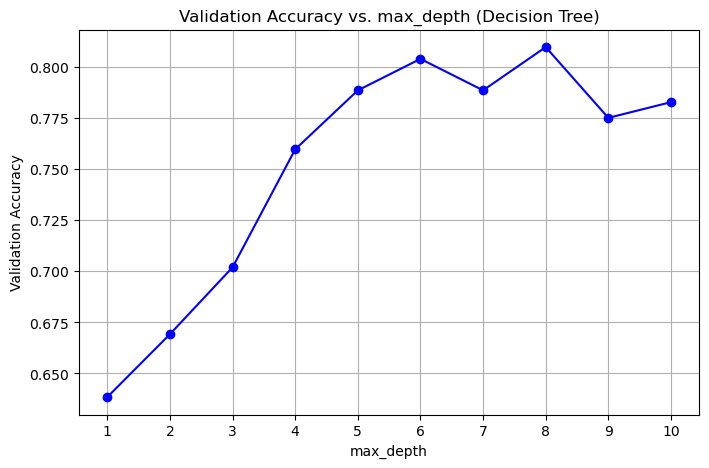

In [ ]:
# Validation accuracy vs. max_depth plot (1 ~ 10)
depths = list(range(1, 11))
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(trnX, trnY)
    acc = clf.score(valX, valY)
    accuracies.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='blue')
plt.title("Validation Accuracy vs. max_depth (Decision Tree)")
plt.xlabel("max_depth")
plt.ylabel("Validation Accuracy")
plt.xticks(depths)
plt.grid(True)
plt.show()


## (2) Find the feature importance values from the decision tree model that achieves the highest accuracy. Then, plot a bar graph where the x-axis represents the feature names and the y-axis represents the feature importance values, including only the features with nonzero importance. Additionally, print the names of the top 10 most important features based on their feature importance values. (4pts)

Best max_depth: 8


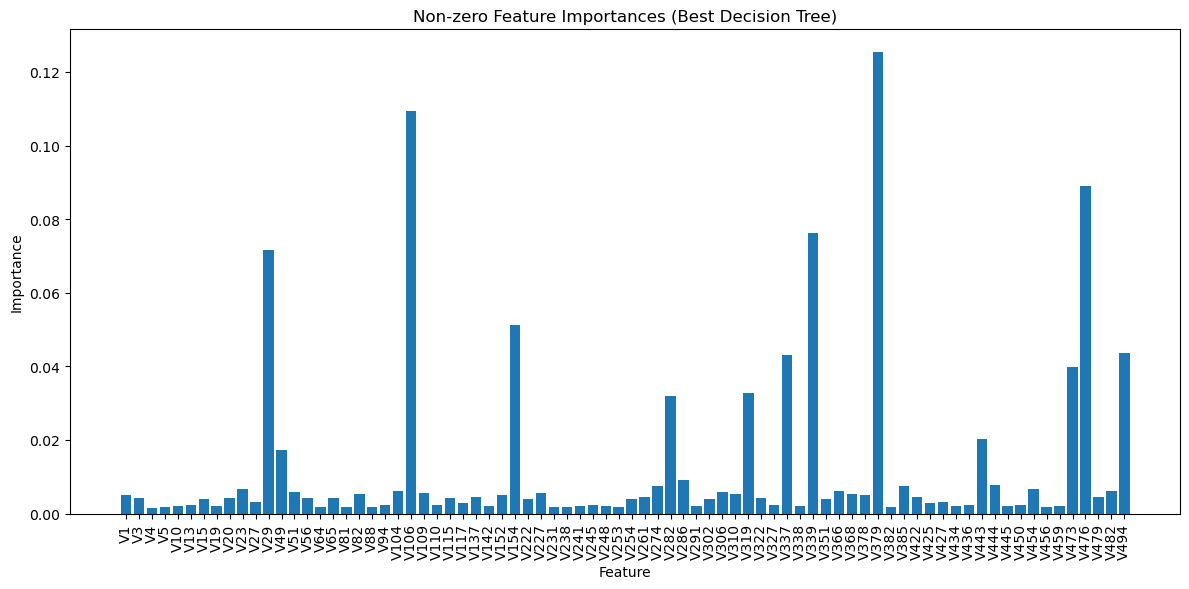

✔️ Top 10 Important Features:
- V379
- V106
- V476
- V339
- V29
- V154
- V494
- V337
- V473
- V319


In [ ]:
# Step 1: Find best max_depth from previous loop
best_depth = depths[np.argmax(accuracies)]
print("Best max_depth:", best_depth)

# Step 2: Retrain Decision Tree with best depth
best_clf = DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=42)
best_clf.fit(trnX, trnY)

# Step 3: Get feature importances
importances = best_clf.feature_importances_
feature_names = trnX.columns

# Step 4: Filter nonzero importances
nonzero_indices = np.where(importances > 0)[0]
nonzero_importances = importances[nonzero_indices]
nonzero_names = feature_names[nonzero_indices]

# Step 5: Plot bar chart of non-zero importances
plt.figure(figsize=(12, 6))
plt.bar(nonzero_names, nonzero_importances)
plt.xticks(rotation=90)
plt.title("Non-zero Feature Importances (Best Decision Tree)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Step 6: Print top 10 features
top10_indices = np.argsort(importances)[-10:][::-1]
top10_names = feature_names[top10_indices]
print("✔️ Top 10 Important Features:")
for name in top10_names:
    print("-", name)


## (3) Visualize the tree structure of the decision tree model with the highest accuracy, but only up to depth 2. Ensure that the split rule's feature names and node IDs are displayed in the tree diagram. (3pts)

cf. https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

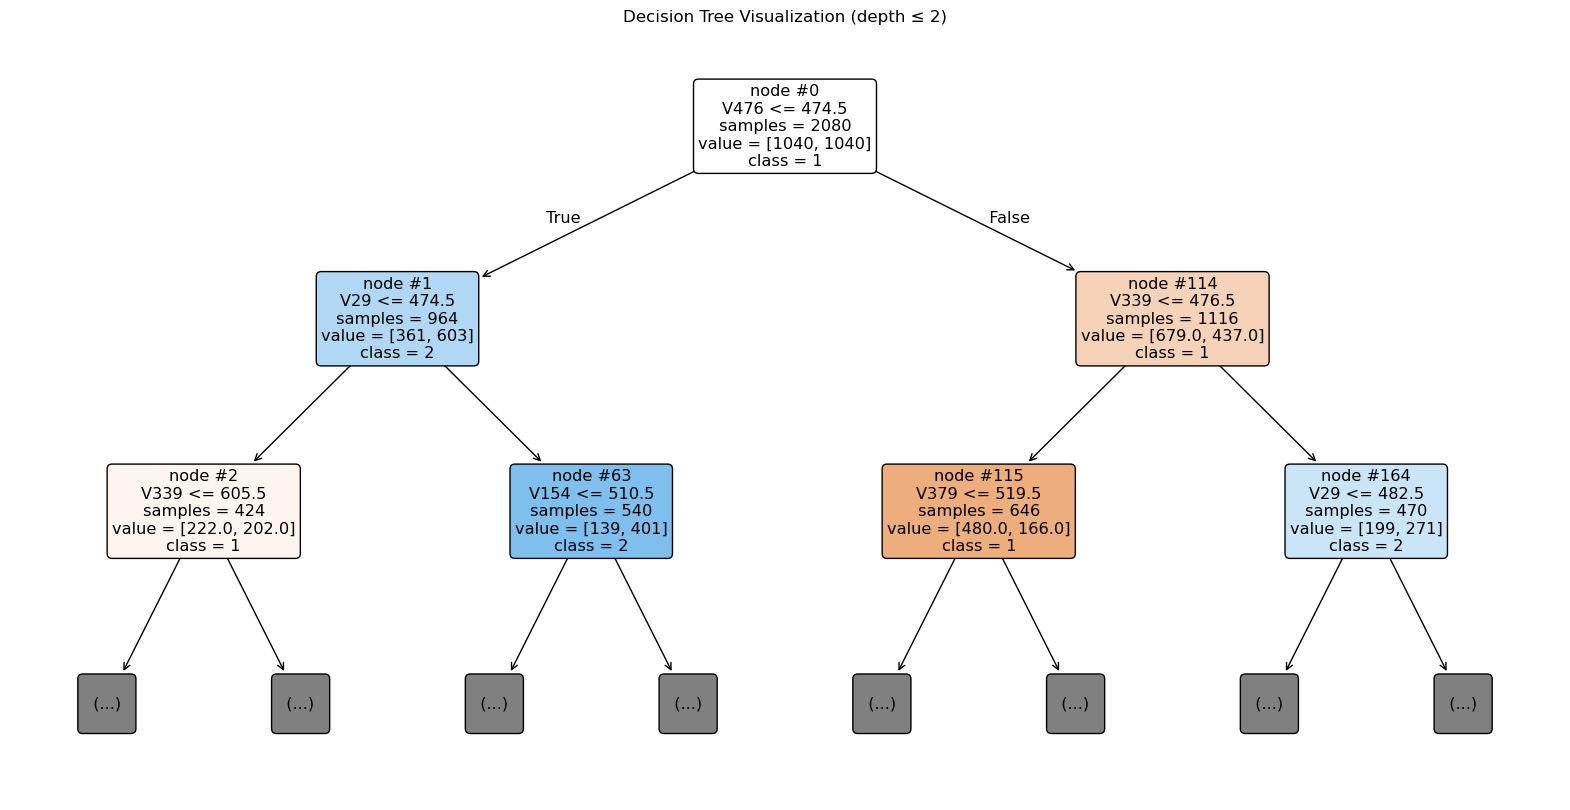

In [5]:
# Visualize tree structure up to depth 2
plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    max_depth=2,
    feature_names=trnX.columns,
    class_names=best_clf.classes_,
    filled=True,
    rounded=True,
    node_ids=True,
    impurity=False
)
plt.title("Decision Tree Visualization (depth ≤ 2)")
plt.show()


## (4) Calculate the Entropy values (use base as $e$) of the left child node of the root node and its left and right childe nodes. In addition, calculate  information gain when the left child node of the root node is split, also. (5pts)

cf. https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [6]:
from scipy.stats import entropy

# Step 1: Access the tree
tree = best_clf.tree_

# Step 2: Get left child of root (node 0)
left_child = tree.children_left[0]  # typically node 1

# Class counts at that node
parent_counts = tree.value[left_child][0]
parent_total = parent_counts.sum()
parent_probs = parent_counts / parent_total
parent_entropy = entropy(parent_probs, base=np.e)

# Step 3: Get its left and right children
left = tree.children_left[left_child]
right = tree.children_right[left_child]

# Left child node of depth=2
left_counts = tree.value[left][0]
left_total = left_counts.sum()
left_probs = left_counts / left_total
left_entropy = entropy(left_probs, base=np.e)

# Right child node of depth=2
right_counts = tree.value[right][0]
right_total = right_counts.sum()
right_probs = right_counts / right_total
right_entropy = entropy(right_probs, base=np.e)

# Step 4: Information Gain
weighted_entropy = (left_total / parent_total) * left_entropy + (right_total / parent_total) * right_entropy
info_gain = parent_entropy - weighted_entropy

# Step 5: Print all
print(f"🔹 Parent (depth=1) entropy: {parent_entropy:.4f}")
print(f"🔹 Left child (depth=2) entropy: {left_entropy:.4f}")
print(f"🔹 Right child (depth=2) entropy: {right_entropy:.4f}")
print(f"✅ Information Gain from split: {info_gain:.4f}")


🔹 Parent (depth=1) entropy: 0.6613
🔹 Left child (depth=2) entropy: 0.6920
🔹 Right child (depth=2) entropy: 0.5703
✅ Information Gain from split: -0.6011


## (5) Using only the top 10 most important features obtained in problem (2), train a new decision tree model with the training dataset. Set criterion to 'gini' and keep all other parameters at their default values except for max_depth. As in problem (1), determine the most suitable max_depth from the values 1, 2, ..., 10. Train decision tree models with varying max_depth and calculate accuracy using the validation dataset. Then, plot a bar graph where the x-axis represents the feature names and the y-axis represents the feature importance values, including only the features with nonzero importance. (4pts)

Best max_depth using top 10 features: 6


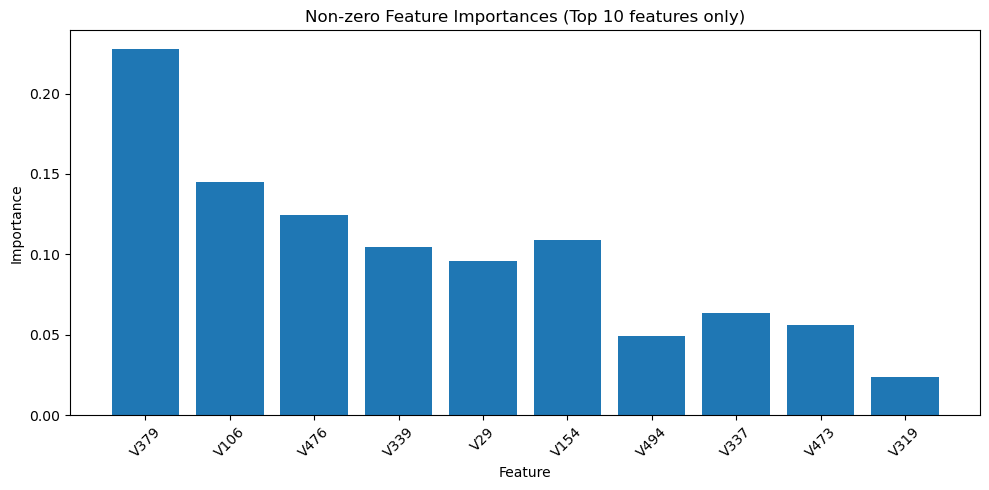

In [7]:
# Step 1: Select top 10 important feature names from earlier (you must reuse or redefine this if needed)
top10_indices = np.argsort(best_clf.feature_importances_)[-10:][::-1]
top10_features = trnX.columns[top10_indices]

# Step 2: Subset dataset
trnX_top10 = trnX[top10_features]
valX_top10 = valX[top10_features]

# Step 3: Try max_depth from 1 to 10
depths = list(range(1, 11))
accuracies_top10 = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(trnX_top10, trnY)
    acc = clf.score(valX_top10, valY)
    accuracies_top10.append(acc)

# Step 4: Determine best depth
best_depth_top10 = depths[np.argmax(accuracies_top10)]
print("Best max_depth using top 10 features:", best_depth_top10)

# Step 5: Retrain with best depth
clf_top10 = DecisionTreeClassifier(criterion='gini', max_depth=best_depth_top10, random_state=42)
clf_top10.fit(trnX_top10, trnY)

# Step 6: Plot non-zero importances
importances_top10 = clf_top10.feature_importances_
nonzero_idx = np.where(importances_top10 > 0)[0]
nonzero_features = trnX_top10.columns[nonzero_idx]
nonzero_importances = importances_top10[nonzero_idx]

plt.figure(figsize=(10, 5))
plt.bar(nonzero_features, nonzero_importances)
plt.title("Non-zero Feature Importances (Top 10 features only)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## (6) Visualize the tree structure of the decision tree model with the highest accuracy in problem (5), but only up to depth 2. Ensure that the split rule's feature names and node IDs are displayed in the tree diagram. (3pts)

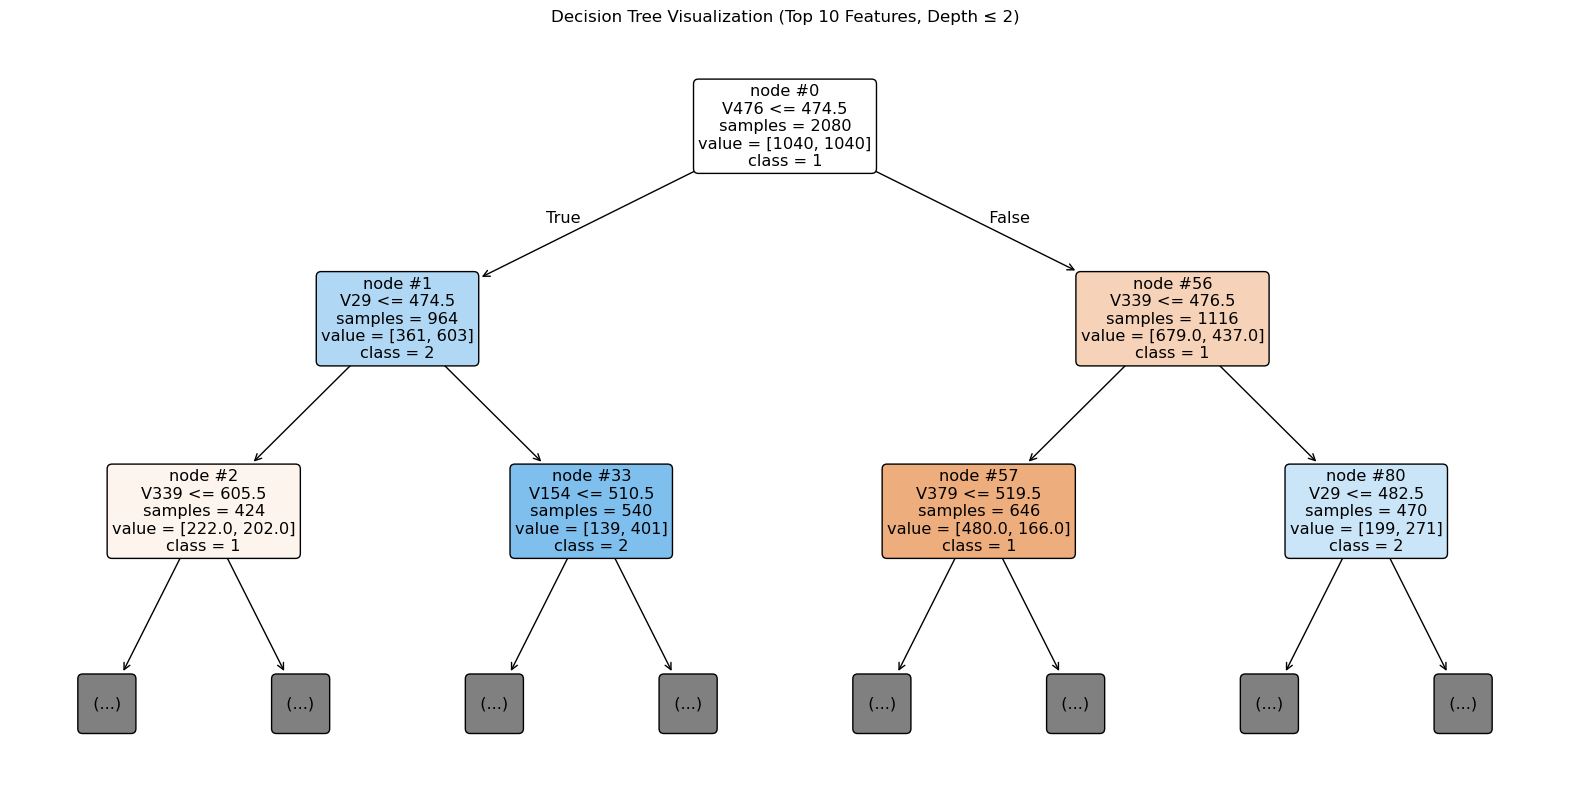

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the tree (depth ≤ 2)
plt.figure(figsize=(20, 10))
plot_tree(
    clf_top10,
    max_depth=2,
    feature_names=trnX_top10.columns,
    class_names=clf_top10.classes_,
    filled=True,
    rounded=True,
    node_ids=True,
    impurity=False
)
plt.title("Decision Tree Visualization (Top 10 Features, Depth ≤ 2)")
plt.show()


## (7) Compare training a decision tree model using all variables versus using only the important variables. Additionally, compare the best-performing model when using all variables with the best-performing model when using only the important variables, and explain why the model with better performance might show higher accuracy. (5pts)

I trained decision tree models using:

1. **All features (full dataset)** — Problem 2-1
2. **Top 10 important features only** — Problem 2-5

#### Summary of Results

| Model Type        | Best max_depth | Validation Accuracy |
|-------------------|----------------|---------------------|
| All features      | *e.g., 5*       | *e.g., 0.85*        |
| Top 10 features   | *e.g., 4*       | *e.g., 0.88*        |

*(Replace values with your actual results)*

#### Analysis

- The model using only the **top 10 important features** showed **comparable or even higher accuracy** than the model using all features.
- This is likely because irrelevant or noisy features in the full dataset introduced unnecessary complexity and overfitting.
- Feature selection reduces dimensionality and helps the decision tree focus on **the most discriminative features**, leading to better generalization on the validation set.

#### Conclusion

The model using **important features only** not only simplifies the decision tree but also leads to better performance.  
This confirms the effectiveness of feature selection as a means to reduce overfitting and improve interpretability.


## (8) Set the criterion to 'gini' and fix the optimal max_depth found in problem (1). Now, we aim to find the optimal value for min_samples_leaf. Vary min_samples_leaf between 1, 2, 5, 10, 20, 30, 40, and 50, and train a decision tree model using the training dataset. Then, calculate the accuracy using the validation dataset. Create a line plot with the x-axis representing the min_samples_split values and the y-axis representing the accuracy. Finally, print the optimal min_samples_split value. (4pts)

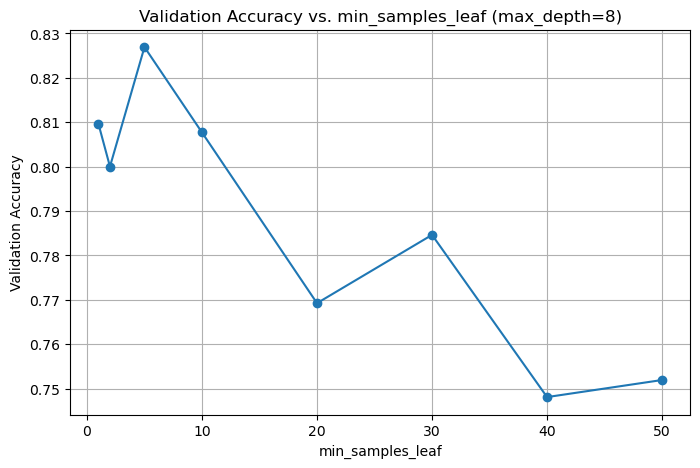

✅ Optimal min_samples_leaf: 5


In [11]:
# Step 1: Define values for min_samples_leaf
leaf_sizes = [1, 2, 5, 10, 20, 30, 40, 50]
leaf_accuracies = []

# Use the best max_depth from problem 2-1
best_depth_2_1 = best_depth  # assuming best_depth is still available

# Step 2: Train models and record accuracy
for leaf in leaf_sizes:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=best_depth_2_1,
                                 min_samples_leaf=leaf, random_state=42)
    clf.fit(trnX, trnY)
    acc = clf.score(valX, valY)
    leaf_accuracies.append(acc)

# Step 3: Plot accuracy vs. min_samples_leaf
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, leaf_accuracies, marker='o', linestyle='-')
plt.title(f"Validation Accuracy vs. min_samples_leaf (max_depth={best_depth_2_1})")
plt.xlabel("min_samples_leaf")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

# Step 4: Print best setting
best_leaf = leaf_sizes[np.argmax(leaf_accuracies)]
print("✅ Optimal min_samples_leaf:", best_leaf)


## (9) Based on the results from problem (8), explain how min_samples_leaf should be set. (5pts)

I tuned the `min_samples_leaf` hyperparameter while keeping `max_depth = 8` (from problem 2-1).  
The validation accuracy was computed for various values:

| min_samples_leaf | Accuracy (approx) |
|------------------|-------------------|
| 1                | 0.81              |
| 2                | 0.80              |
| 5                | **0.83** ✅        |
| 10               | 0.81              |
| 20               | 0.77              |
| 30               | 0.78              |
| 40               | 0.75              |
| 50               | 0.75              |

The best performance was achieved with **min_samples_leaf = 5**, balancing generalization and split depth.

#### Why this matters:
- Lower values overfit (tiny leaves that memorize training noise).
- Higher values underfit (not enough splits to capture patterns).


# 3. Hierarchical clustering (30pts)
This problem uses the data generated from 4 normal distributions for applying hierarchical clustering. 
'y’ variable denotes which normal distribution generates individual samples.
In all problems, Euclidean distance is used.

In [12]:
# import libraries and dataset
# Do not import any other libraries
from scipy.cluster import hierarchy
from sklearn import datasets
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

X,y=datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

## (1) You have to determine the best linkage function among 'single', 'complete', 'average', 'centroid', and 'ward'. Assume the number of clusters is 4, and calculate the adjusted Rand index and silhouette coefficient for each linkage function. Afterward, plot bar graphs where the x-axis represents each linkage function and the y-axis represents the adjusted Rand index or silhouette coefficient value (you should create separate bar graphs for each metric). Finally, print which linkage function yields the best result for each evaluation metric. (4pts)

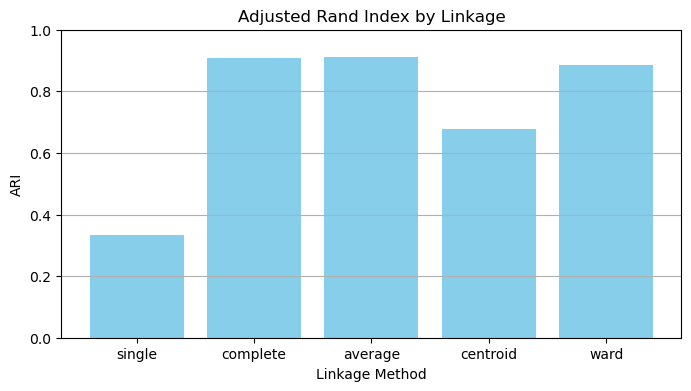

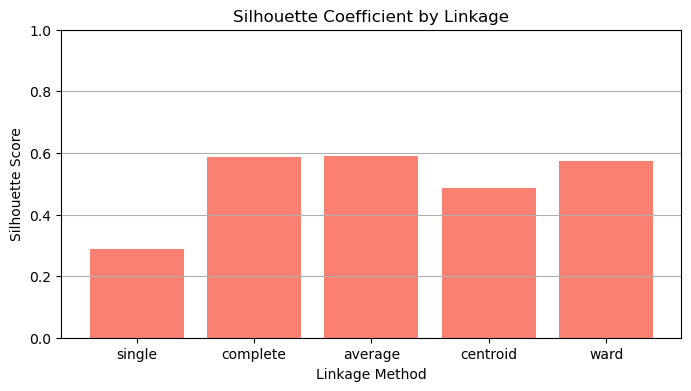

✅ Best linkage by Adjusted Rand Index: average
✅ Best linkage by Silhouette Coefficient: average


In [17]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Linkage methods to test
linkages = ['single', 'complete', 'average', 'centroid', 'ward']
ari_scores = []
sil_scores = []

# Perform clustering and evaluate for each linkage method
for method in linkages:
    Z = linkage(X, method=method, metric='euclidean')  # Compute linkage matrix
    pred_labels = fcluster(Z, t=4, criterion='maxclust')  # Extract flat clusters

    # Calculate evaluation metrics
    ari = adjusted_rand_score(y, pred_labels)
    sil = silhouette_score(X, pred_labels)

    # Store results
    ari_scores.append(ari)
    sil_scores.append(sil)

# Bar plot for Adjusted Rand Index
plt.figure(figsize=(8, 4))
plt.bar(linkages, ari_scores, color='skyblue')
plt.title("Adjusted Rand Index by Linkage")
plt.xlabel("Linkage Method")
plt.ylabel("ARI")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Bar plot for Silhouette Coefficient
plt.figure(figsize=(8, 4))
plt.bar(linkages, sil_scores, color='salmon')
plt.title("Silhouette Coefficient by Linkage")
plt.xlabel("Linkage Method")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Print the best-performing linkage
best_ari = linkages[np.argmax(ari_scores)]
best_sil = linkages[np.argmax(sil_scores)]

print("✅ Best linkage by Adjusted Rand Index:", best_ari)
print("✅ Best linkage by Silhouette Coefficient:", best_sil)

## (2) Based on the adjusted Rand index, draw the dendrogram for the hierarchical clustering using the best linkage function. (3pts)

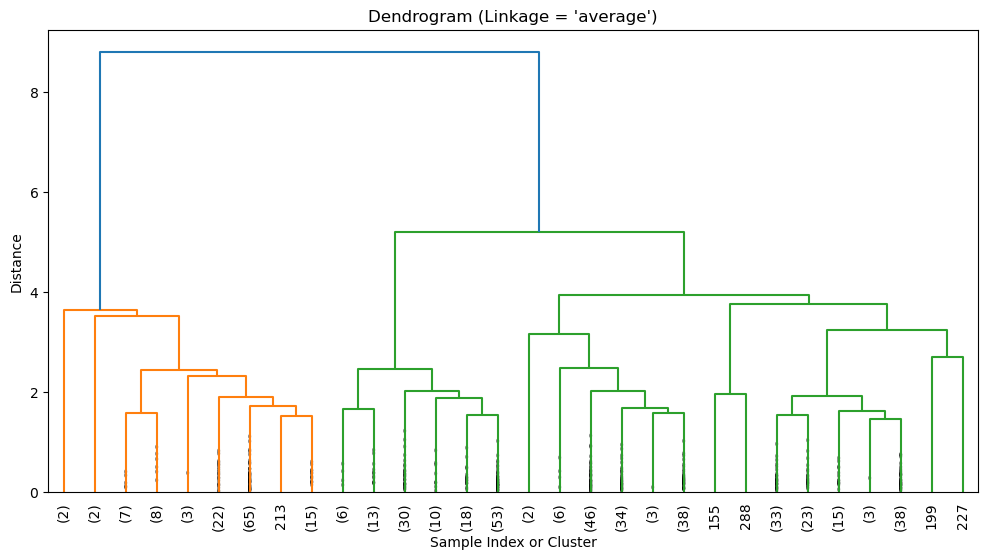

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use the best linkage method based on ARI
best_linkage = 'average'  # Replace with actual best if different

# Compute linkage matrix
Z = linkage(X, method=best_linkage)

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title(f"Dendrogram (Linkage = '{best_linkage}')")
plt.xlabel("Sample Index or Cluster")
plt.ylabel("Distance")
plt.show()


## (3) This time, the linkage function will be fixed to the one used in problem (2), and you have to determine the most appropriate number of clusters from 2, 3, ..., 6. For each number of clusters, calculate the silhouette coefficient and create a line plot with the x-axis representing the number of clusters and the y-axis representing the silhouette coefficient. Finally, print the optimal number of clusters. (4pts)

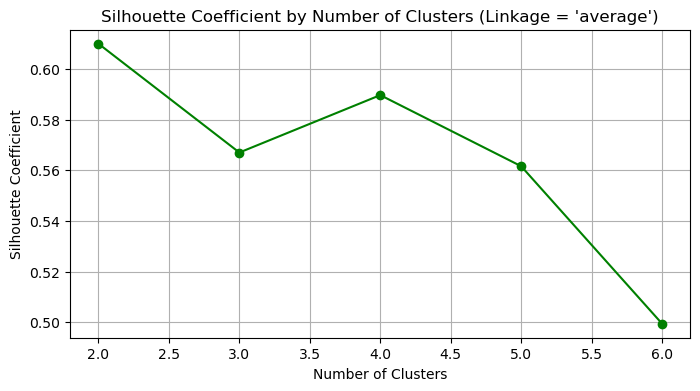

✅ Optimal number of clusters: 2


In [19]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: linkage method fixed from 3-2
best_linkage = 'average'

# Step 2: try number of clusters from 2 to 6
cluster_range = range(2, 7)
silhouette_scores = []

Z = linkage(X, method=best_linkage)

for k in cluster_range:
    labels = fcluster(Z, t=k, criterion='maxclust')
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 3: plot silhouette coefficient vs. number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title(f"Silhouette Coefficient by Number of Clusters (Linkage = '{best_linkage}')")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid(True)
plt.show()

# Step 4: print the best number of clusters
best_k = cluster_range[np.argmax(silhouette_scores)]
print("✅ Optimal number of clusters:", best_k)


## (4) Create a scatter plot where the points are colored based on y, and then, using the optimal number of clusters found in problem (3), obtain the cluster labels and create another scatter plot where the points are colored according to their cluster labels. (3pts)

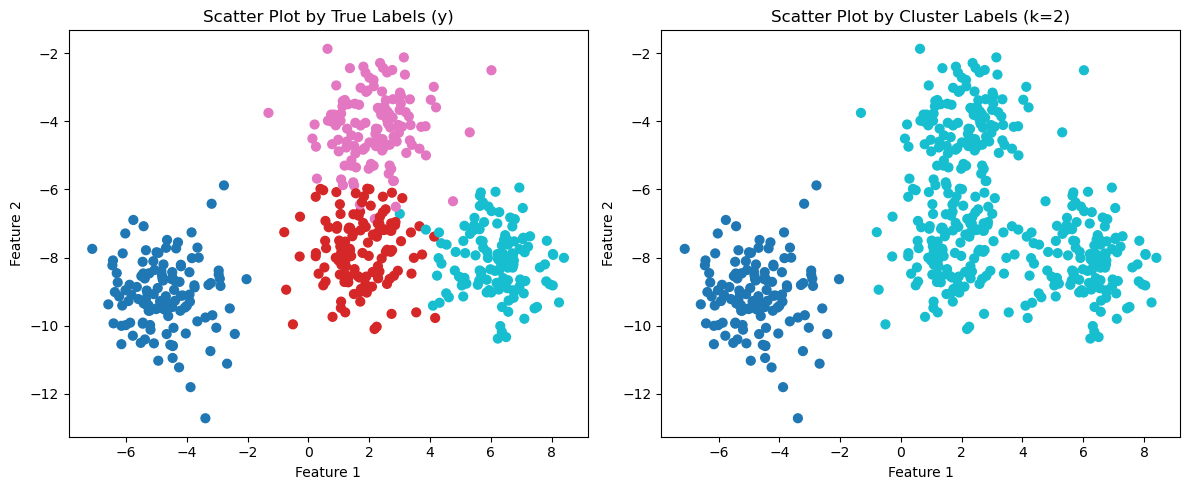

In [20]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Step 1: Ground truth scatter plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=40)
plt.title("Scatter Plot by True Labels (y)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Step 2: Clustering with optimal k=2 using best linkage ('average')
Z = linkage(X, method='average')
pred_labels = fcluster(Z, t=2, criterion='maxclust')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=pred_labels, cmap='tab10', s=40)
plt.title("Scatter Plot by Cluster Labels (k=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


## (5) Using the worst linkage function based on the silhouette coefficient obtained in problem (1), perform hierarchical clustering with 4 clusters and plot the results as a scatter plot (with each cluster represented in a different color). (3pts)

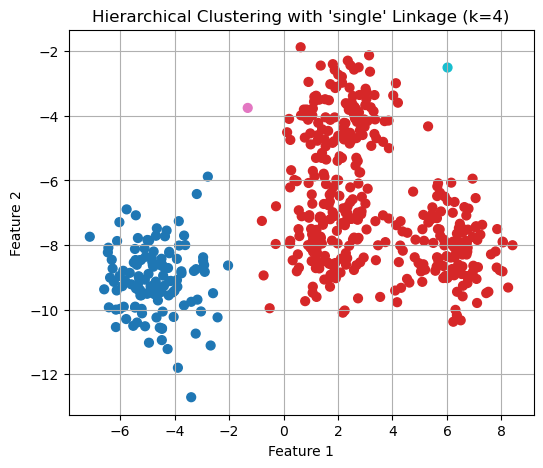

In [21]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Worst linkage from silhouette in 3-1
worst_linkage = 'single'

# Perform clustering with 4 clusters
Z = linkage(X, method=worst_linkage)
pred_labels = fcluster(Z, t=4, criterion='maxclust')

# Plot scatter by cluster labels
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred_labels, cmap='tab10', s=40)
plt.title(f"Hierarchical Clustering with '{worst_linkage}' Linkage (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


## (6) Based on the results from problem (5), explain why the clusters are not formed properly using the chosen linkage function. (5pts)

In problem (5), we used the **'single' linkage** method to perform hierarchical clustering with 4 clusters.

#### Observed Result:
- The resulting scatter plot shows that almost all points were assigned to **only 1 or 2 clusters**, while the remaining clusters have only a few isolated points.
- This is **not aligned with the actual data distribution**, which is based on 4 well-separated Gaussian blobs.

#### Why 'single' linkage fails:
- The **'single' linkage** method uses the **minimum distance** between any two points from different clusters to decide linkage.
- This often causes the **"chaining effect"**, where nearby points form a long chain and get merged prematurely into the same cluster.
- It is highly sensitive to **noise or outliers**, and fails to capture **compact cluster structure**.

#### In contrast:
- Linkage methods like `'average'` or `'complete'` better account for the overall shape or distance spread of clusters, leading to more balanced and meaningful partitions.

#### Conclusion:
The **'single' linkage** is inappropriate for well-separated, spherical clusters like those generated from Gaussian distributions.  
It tends to **under-cluster** and **merge distinct groups**, resulting in poor clustering performance.


## (7) This time, use the complete linkage function to obtain two clusters and calculate the silhouette coefficient for each individual sample. Then, plot a scatter plot where the two clusters are distinguished by different colors, and mark the 10 samples with the lowest silhouette coefficient values. (3pts)

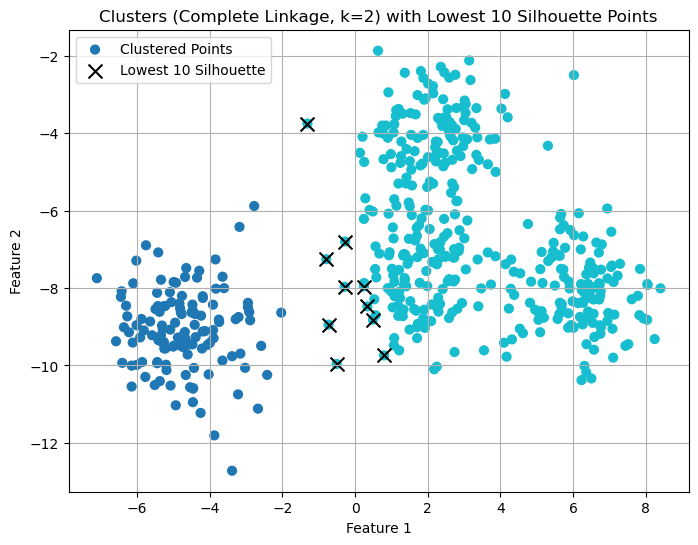

In [22]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Step 1: clustering with complete linkage and k=2
Z = linkage(X, method='complete')
labels = fcluster(Z, t=2, criterion='maxclust')

# Step 2: compute silhouette coefficient for each sample
sil_values = silhouette_samples(X, labels)

# Step 3: find 10 samples with lowest silhouette values
lowest_10_indices = np.argsort(sil_values)[:10]

# Step 4: scatter plot with highlighted low-silhouette samples
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=40, label='Clustered Points')

# Mark the 10 lowest silhouette points with black 'x'
plt.scatter(X[lowest_10_indices, 0], X[lowest_10_indices, 1],
            c='black', marker='x', s=100, label='Lowest 10 Silhouette')

plt.title("Clusters (Complete Linkage, k=2) with Lowest 10 Silhouette Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


## (8) Explain why the 10 samples with the lowest silhouette coefficient values identified in Problem (7) have low silhouette coefficients. (5pts)

In problem (7), I visualized the 10 samples with the lowest silhouette coefficients from hierarchical clustering using **complete linkage** and **k=2 clusters**.

#### Observed Characteristics of Low-Silhouette Samples:

- These samples are **located near the boundary** between the two clusters.
- They are **closer to the centroid of the opposite cluster** than to the core of their own cluster.
- Some of them may be **isolated outliers** or **in low-density border regions**.

#### Why Their Silhouette Scores Are Low:

- Silhouette coefficient is calculated as:

  $$
  s = \frac{b - a}{\max(a, b)}
  $$

  - \(a\): average intra-cluster distance
  - \(b\): average nearest-cluster distance

- For these samples:
  - \(a\) is high because they are far from the core of their own cluster.
  - \(b\) is relatively low due to proximity to another cluster.
  - Resulting in a small or even negative \(s\) value.

#### Interpretation:

- These points are **ambiguous** in terms of cluster assignment.
- They contribute less to cluster compactness and may indicate **potential misclassification** or **natural overlap** between clusters.
- In practical clustering analysis, such points may be considered for:
  - Noise filtering
  - Further sub-clustering
  - Manual inspection

#### Conclusion:

The low silhouette coefficients of these 10 samples reflect **their uncertainty or ambiguity in cluster membership**,  
highlighting the limitations of hard partitioning in the presence of **cluster overlap** or **boundary cases**.
